In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall


train_dir = '/content/drive/MyDrive/split_dataset/train'
validation_dir = '/content/drive/MyDrive/split_dataset/validation'
test_dir = '/content/drive/MyDrive/split_dataset/test'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)


model = load_model('/content/drive/MyDrive/best_model.h5')

model.trainable = True

model.compile(optimizer=Adamax(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model2.h5', save_best_only=True, monitor='val_loss')

history_fine = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)


Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
188/188 [==============================] - ETA: 0s - loss: 0.0735 - accuracy: 0.9717 - precision: 0.9736 - recall: 0.9697

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/188 [==============================] - 2386s 12s/step - loss: 0.0735 - accuracy: 0.9717 - precision: 0.9736 - recall: 0.9697 - val_loss: 2.4859 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
188/188 [==============================] - 264s 1s/step - loss: 0.0158 - accuracy: 0.9942 - precision: 0.9947 - recall: 0.9937 - val_loss: 1.8004 - val_accuracy: 0.5275 - val_precision: 1.0000 - val_recall: 0.0550
Epoch 3/10
188/188 [==============================] - 265s 1s/step - loss: 0.0152 - accuracy: 0.9948 - precision: 0.9943 - recall: 0.9953 - val_loss: 0.4377 - val_accuracy: 0.8530 - val_precision: 1.0000 - val_recall: 0.7060
Epoch 4/10
188/188 [==============================] - 267s 1s/step - loss: 0.0084 - accuracy: 0.9970 - precision: 0.9983 - recall: 0.9957 - val_loss: 0.0028 - val_accuracy: 0.9995 - val_precision: 0.9990 - val_recall: 1.0000
Epoch 5/10
188/188 [==============================] - 269s 1s/step - loss: 0.0073 - accuracy: 0.9980 

In [ ]:

print(f"Training loss : {history_fine.history['loss'][-1]:0.2f}\n")
print(f"Training accuracy : {(history_fine.history['accuracy'][-1]*100):0.2f}%\n")
print(f"Training precision : {history_fine.history['precision'][-1]:0.2f}\n")
print(f"Training recall : {history_fine.history['recall'][-1]:0.2f}\n")

print(f"Validation loss : {history_fine.history['val_loss'][-1]:0.2f}\n")
print(f"Validation accuracy : {(history_fine.history['val_accuracy'][-1]*100):0.2f}%\n")
print(f"Validation precision : {history_fine.history['val_precision'][-1]:0.2f}\n")
print(f"Validation recall : {history_fine.history['val_recall'][-1]:0.2f}\n")


Training loss : 0.00

Training accuracy : 99.93%

Training precision : 1.00

Training recall : 1.00

Validation loss : 0.00

Validation accuracy : 99.80%

Validation precision : 1.00

Validation recall : 1.00



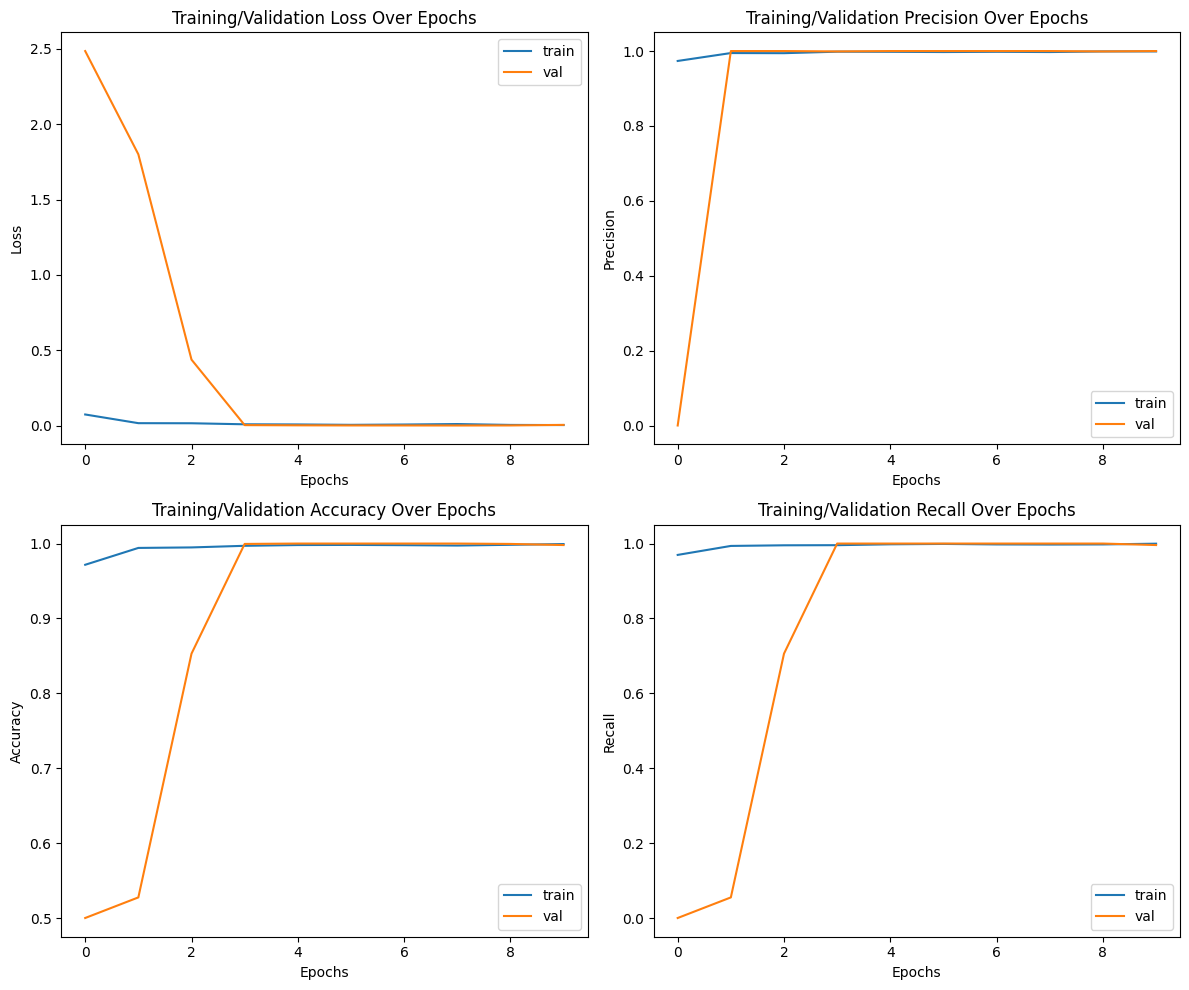

In [ ]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 2, figsize=(12, 10))


axis[0, 0].plot(history_fine.history['loss'], label='train')
axis[0, 0].plot(history_fine.history['val_loss'], label='val')
axis[0, 0].set_title('Training/Validation Loss Over Epochs')
axis[0, 0].set_xlabel('Epochs')
axis[0, 0].set_ylabel('Loss')
axis[0, 0].legend()


axis[1, 0].plot(history_fine.history['accuracy'], label='train')
axis[1, 0].plot(history_fine.history['val_accuracy'], label='val')
axis[1, 0].set_title('Training/Validation Accuracy Over Epochs')
axis[1, 0].set_xlabel('Epochs')
axis[1, 0].set_ylabel('Accuracy')
axis[1, 0].legend()


axis[0, 1].plot(history_fine.history['precision'], label='train')
axis[0, 1].plot(history_fine.history['val_precision'], label='val')
axis[0, 1].set_title('Training/Validation Precision Over Epochs')
axis[0, 1].set_xlabel('Epochs')
axis[0, 1].set_ylabel('Precision')
axis[0, 1].legend()


axis[1, 1].plot(history_fine.history['recall'], label='train')
axis[1, 1].plot(history_fine.history['val_recall'], label='val')
axis[1, 1].set_title('Training/Validation Recall Over Epochs')
axis[1, 1].set_xlabel('Epochs')
axis[1, 1].set_ylabel('Recall')
axis[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')

63/63 [==============================] - 873s 14s/step - loss: 0.0061 - accuracy: 0.9975 - precision: 1.0000 - recall: 0.9950
Test Loss: 0.0061
Test Accuracy: 0.9975
Test Precision: 1.0000
Test Recall: 0.9950


In [ ]:
import shutil
source_path = '/content/best_model2.h5'
destination_path = '/content/drive/My Drive/best_model2.h5'
shutil.copy(source_path, destination_path)

print(f'Model saved to {destination_path}')

Model saved to /content/drive/My Drive/best_model2.h5
